In [1]:
# 查看当前kernel下已安装的包  
#!pip install opencv-python --user # opencv-python 4.5.1.48
#!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple opencv-python==3.4.8.29
#!pip list --format=columns

# 1.ORB特征点提取和配准

最小距离：14.000000
最大距离：92.000000
匹配数：24


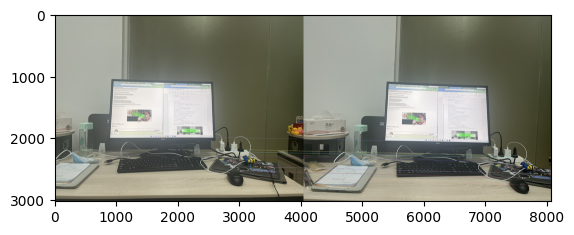

In [13]:
import cv2 as cv  ## opencv-python==3.4.8.29
import numpy as np
from  matplotlib import pyplot as plt

# 读取图片
# im1 = cv.imread('data\\1.jpg')
# im2 = cv.imread('data\\2.jpg')
im1 = cv.imread('data\\3.jpg')
im2 = cv.imread('data\\4.jpg')

# ORB特征提取
orb = cv.ORB_create()
kp1 = orb.detect(im1)  
kp2 = orb.detect(im2)
kp1, des1 = orb.compute(im1, kp1) # 求特征
kp2, des2 = orb.compute(im2, kp2) # 求特征
bf = cv.BFMatcher(cv.NORM_HAMMING)# 初始化Matcher
matches = bf.match(des1, des2)    # 配准
# 进行初步筛选
min_distance = 10000
max_distance = 0
for x in matches:
    if x.distance < min_distance: min_distance = x.distance
    if x.distance > max_distance: max_distance = x.distance
print('最小距离：%f' % min_distance)
print('最大距离：%f' % max_distance)
good_match = []
for x in matches:
    if x.distance <= max(2 * min_distance, 30):
        good_match.append(x)
print('匹配数：%d' % len(good_match))
outimage = cv.drawMatches(im1, kp1, im2, kp2, good_match, outImg=None)
plt.imshow(outimage[:,:,::-1])
plt.show()

# Brute-Force Matching with SIFT Descriptors and Ratio Test

匹配数：2599


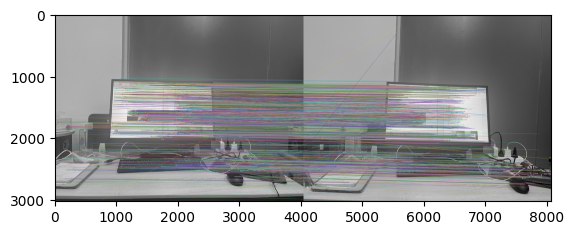

(<matplotlib.image.AxesImage at 0x1ad89c64188>, None)

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('data\\3.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('data\\4.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
print('匹配数：%d' % len(good))
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

# FLANN based Matcher

In [8]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

In [9]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

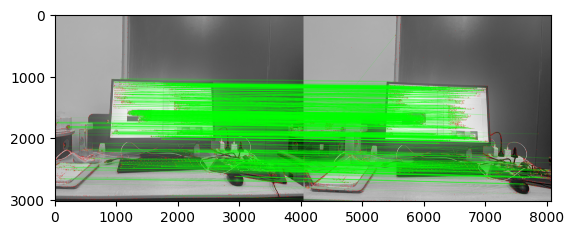

(<matplotlib.image.AxesImage at 0x1adf13e14c8>, None)

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('data\\3.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('data\\4.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()